In [3]:
import pandas as pd #used to read in the revenue file 
import matplotlib.pyplot as plt #for plotting#to read in shape file and provides high #level interface with #matplotlib library for making maps
import geopandas as gpd#import locally saved file
revenue = pd.read_csv('base_data.csv')#import world shape map externally, no need to have a saved file
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [11]:
#view first 5 rows
revenue.head()#inspect count
revenue.info()#view first 5 rows

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 216 entries, 0 to 215
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          215 non-null    object 
 1   Total Cases      216 non-null    object 
 2   New Cases        216 non-null    object 
 3   Total Deaths     20 non-null     object 
 4   New Deaths       216 non-null    object 
 5   Total Recovered  9 non-null      float64
dtypes: float64(1), object(5)
memory usage: 10.2+ KB


In [12]:
world.head()#inspect count
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     177 non-null    int64   
 1   continent   177 non-null    object  
 2   name        177 non-null    object  
 3   iso_a3      177 non-null    object  
 4   gdp_md_est  177 non-null    float64 
 5   geometry    177 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 8.4+ KB


<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 151 entries, 0 to 150
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   pop_est          151 non-null    int64   
 1   continent        151 non-null    object  
 2   name             151 non-null    object  
 3   iso_a3           151 non-null    object  
 4   gdp_md_est       151 non-null    float64 
 5   geometry         151 non-null    geometry
 6   Country          151 non-null    object  
 7   Total Cases      151 non-null    object  
 8   New Cases        151 non-null    object  
 9   Total Deaths     15 non-null     object  
 10  New Deaths       151 non-null    object  
 11  Total Recovered  7 non-null      float64 
dtypes: float64(2), geometry(1), int64(1), object(8)
memory usage: 15.3+ KB


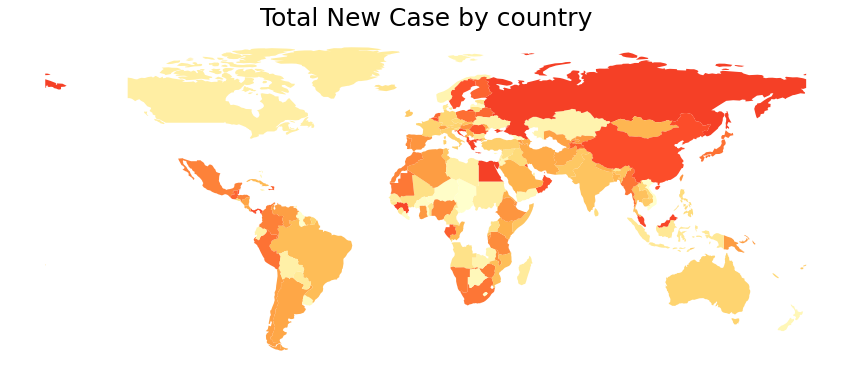

In [61]:
#merge both data sets using country code/iso_a3 as unique identifiers
for_plotting = world.merge(revenue, left_on = 'name', right_on = 'Country')#check the occurrence
for_plotting.info() 
#plot merged file. use dropna to remove any country with no revenue value
#ax = for_plotting.dropna().plot(column='New Cases', cmap = 'YlGnBu', figsize=(15,9))#,scheme='quantiles', k=3, legend = True)
ax = for_plotting.plot(column='New Cases', cmap = 'YlOrRd', figsize=(15,9),scheme='quantiles', k=100, legend = False)#,colorbar= True)
#add title to the map
ax.set_title('Total New Case by country', fontdict= {'fontsize':25})#remove axes
ax.set_axis_off()#move legend to an empty space
#ax.get_legend().set_bbox_to_anchor((.12,.12))
#ax.get_figure()